In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
from datetime import datetime
from citipy import citipy
import os
import requests
from config import weather_api_key

data_file_path = os.path.join('weather_data','cities.csv')

city_data_df = pd.read_csv(data_file_path)
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Husavik,IS,2021-01-27 21:07:40,66.0449,-17.3389,19.40,86,75,8.25
1,1,Lompoc,US,2021-01-27 20:54:10,34.6391,-120.4579,51.80,93,90,13.80
2,2,Weiser,US,2021-01-27 21:08:32,44.2510,-116.9693,46.40,53,75,24.16
3,3,Ushuaia,AR,2021-01-27 21:08:33,-54.8000,-68.3000,41.00,87,75,24.16
4,4,Hofn,IS,2021-01-27 21:08:05,64.2539,-15.2082,25.77,89,1,14.12
5,5,Port Alfred,ZA,2021-01-27 21:08:33,-33.5906,26.8910,64.99,94,28,1.99
6,6,Qaanaaq,GL,2021-01-27 21:08:33,77.4840,-69.3632,-15.74,65,0,8.37
7,7,Ust-Kuyga,RU,2021-01-27 21:08:33,70.0167,135.6000,-39.48,79,96,1.63
8,8,Kaitangata,NZ,2021-01-27 21:03:49,-46.2817,169.8464,51.01,82,61,5.99
9,9,Luganville,VU,2021-01-27 21:08:34,-15.5333,167.1667,76.59,89,100,7.92


In [3]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [4]:
# Import the time module
import time
# Get today's date in seconds
today = time.time()
today

1611851153.9978392

In [5]:
today = time.strftime("%x")
today

'01/28/21'

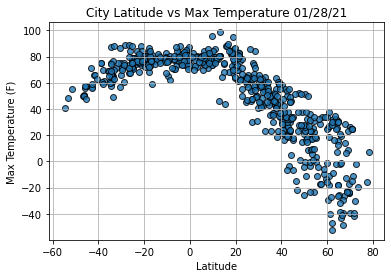

In [6]:
# Build the scatter plot for latitude vs Max Temp
plt.scatter(lats, max_temps, edgecolors="black",linewidths=1,marker='o',
            alpha=0.8,label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

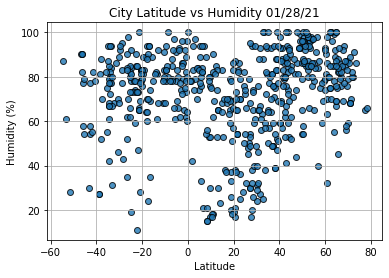

In [7]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolors="black",linewidths=1,marker='o',
            alpha=0.8,label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

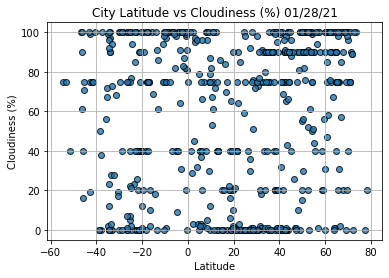

In [8]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolors="black",linewidths=1,marker='o',
            alpha=0.8,label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

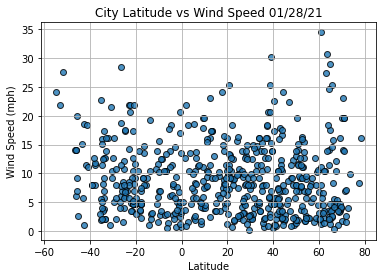

In [9]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolors="black",linewidths=1,marker='o',
            alpha=0.8,label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the wether data
# and plot a regression line and the equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    # Calculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    # Create a scatter plot of the x and y values
    plt.scatter(x_values,y_values)

    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation and add its  coordinates
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [11]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Husavik,IS,2021-01-27 21:07:40,66.0449,-17.3389,19.40,86,75,8.25
1,1,Lompoc,US,2021-01-27 20:54:10,34.6391,-120.4579,51.80,93,90,13.80
2,2,Weiser,US,2021-01-27 21:08:32,44.2510,-116.9693,46.40,53,75,24.16
4,4,Hofn,IS,2021-01-27 21:08:05,64.2539,-15.2082,25.77,89,1,14.12
6,6,Qaanaaq,GL,2021-01-27 21:08:33,77.4840,-69.3632,-15.74,65,0,8.37


In [13]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

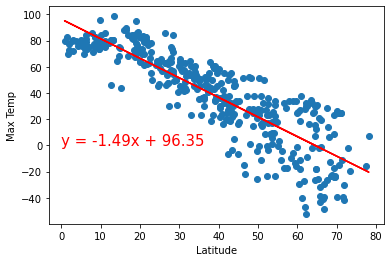

-0.8623436634252815


In [29]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Import linregress
from scipy.stats import linregress

# Call your function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                        'Max Temp', (0,0))

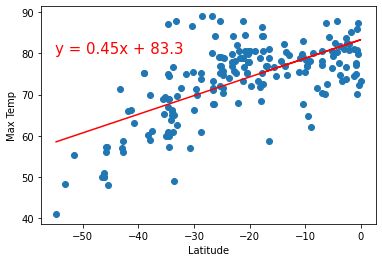

0.6446461922162233


In [30]:
# Linear regression on the souhern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Import linregress
from scipy.stats import linregress

# Call your function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                        'Max Temp', (-55,80))

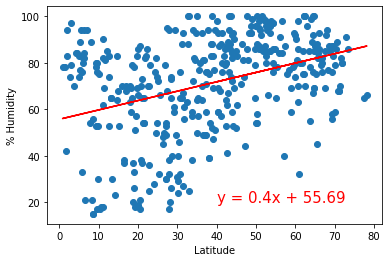

0.37221495973184243


In [31]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Import linregress
from scipy.stats import linregress

# Call your function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for % Humidity',
                        '% Humidity', (40,20))

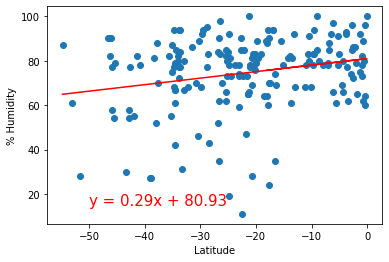

0.23290059976745583


In [32]:
# Linear regression on the northern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Import linregress
from scipy.stats import linregress

# Call your function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for % Humidity',
                        '% Humidity', (-50,15))

In [33]:
northern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Husavik,IS,2021-01-27 21:07:40,66.0449,-17.3389,19.40,86,75,8.25
1,1,Lompoc,US,2021-01-27 20:54:10,34.6391,-120.4579,51.80,93,90,13.80
2,2,Weiser,US,2021-01-27 21:08:32,44.2510,-116.9693,46.40,53,75,24.16
4,4,Hofn,IS,2021-01-27 21:08:05,64.2539,-15.2082,25.77,89,1,14.12
6,6,Qaanaaq,GL,2021-01-27 21:08:33,77.4840,-69.3632,-15.74,65,0,8.37


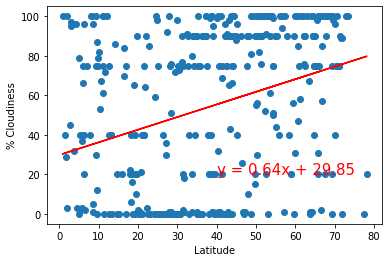

0.31596364664137


In [34]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Import linregress
from scipy.stats import linregress

# Call your function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness',
                        '% Cloudiness', (40,20))

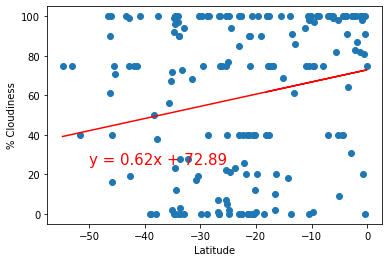

0.21151598295047158


In [36]:
# Linear regression on the northern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Import linregress
from scipy.stats import linregress

# Call your function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness',
                        '% Cloudiness', (-50,25))

In [37]:
northern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Husavik,IS,2021-01-27 21:07:40,66.0449,-17.3389,19.40,86,75,8.25
1,1,Lompoc,US,2021-01-27 20:54:10,34.6391,-120.4579,51.80,93,90,13.80
2,2,Weiser,US,2021-01-27 21:08:32,44.2510,-116.9693,46.40,53,75,24.16
4,4,Hofn,IS,2021-01-27 21:08:05,64.2539,-15.2082,25.77,89,1,14.12
6,6,Qaanaaq,GL,2021-01-27 21:08:33,77.4840,-69.3632,-15.74,65,0,8.37


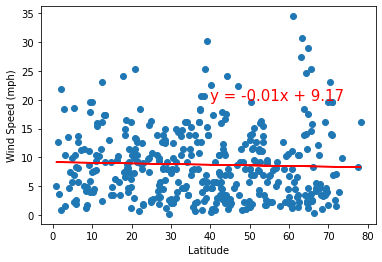

-0.03589041210373229


In [38]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Import linregress
from scipy.stats import linregress

# Call your function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed',
                        'Wind Speed (mph)', (40,20))

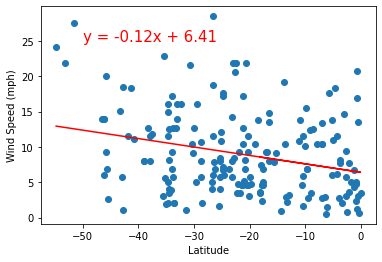

-0.27016855740995366


In [39]:
# Linear regression on the northern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Import linregress
from scipy.stats import linregress

# Call your function
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed',
                        'Wind Speed (mph)', (-50,25))